In [179]:
import pandas as pd


In [180]:
df=pd.read_csv("salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [181]:
from sklearn.preprocessing import LabelEncoder

In [182]:
le_company=LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [183]:
input=df.drop(["salary_more_then_100k"],axis="columns")
target=df["salary_more_then_100k"]

In [184]:
input

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [185]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [186]:
input["company_new"]=le_company.fit_transform(input["company"])
input["degree_new"]=le_company.fit_transform(input["degree"])
input["job_new"]=le_company.fit_transform(input["job"])

In [187]:
input_new=input.drop(["company","job","degree"],axis="columns")

In [188]:
input_new

,company_new,degree_new,job_new
0,2,0,2
1,2,1,2
2,2,0,0
3,2,1,0
4,2,0,1
5,2,1,1
6,0,1,2
7,0,0,1
8,0,0,0
9,0,1,0


In [189]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test =train_test_split(input_new,target,test_size=0.2)
 

In [191]:
X_train

,company_new,degree_new,job_new
1,2,1,2
14,1,0,1
6,0,1,2
4,2,0,1
13,1,1,0
15,1,1,1
5,2,1,1
2,2,0,0
7,0,0,1
8,0,0,0


In [192]:
model=tree.DecisionTreeClassifier()
model.fit(X_train.values,y_train)

DecisionTreeClassifier()

In [193]:
model.score(X_test,y_test)*100

c:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


75.0

In [194]:
y_predict=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)

c:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [195]:
cm

array([[1, 0],
       [1, 2]], dtype=int64)

In [196]:
len(X_test)

4

In [197]:
y_test

3     1
11    1
0     0
9     1
Name: salary_more_then_100k, dtype: int64

In [198]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

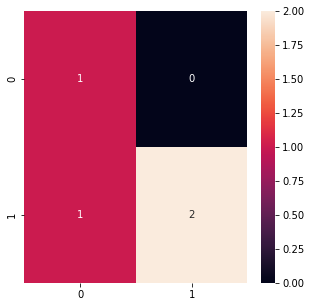

In [199]:
plt.figure(figsize=(5,5))
sn.heatmap(cm,annot=True)

In [200]:
#To predict facebook	computer programmer	masters
model.predict([[1,1,1]])

array([1], dtype=int64)

In [201]:
#to predict abc pharma	sales executive	masters

model.predict([[0,1,2]])

array([0], dtype=int64)